In [35]:
#when loading the temperature data,  set a MultiIndex of stations and date and  parse the dates. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
df=pd.read_csv('temperature.csv', index_col=['stations', 'date'],parse_dates=True)
df

temperature_type  temperature  Unnamed: 4 Unnamed: 5  \
stations    date                                                              
NZ000936150 2004-01-01             TMAX          190         NaN        NaN   
            2004-01-01             TMIN          128         NaN        NaN   
NZ000093012 2004-01-01             TMAX          234         NaN        NaN   
            2004-01-01             TMIN          106         NaN        NaN   
NZ000939870 2004-01-01             TMAX          196         NaN        NaN   
...                                 ...          ...         ...        ...   
NZ000093994 1940-12-29             TMIN          182         NaN        NaN   
            1940-12-30             TMAX          234         NaN        NaN   
            1940-12-30             TMIN          176         NaN        NaN   
            1940-12-31             TMAX          234         NaN        NaN   
            1940-12-31             TMIN          169         NaN        NaN   

                       Unnamed: 6  Unnamed: 7  year  
stations    date                                     
NZ000936150 2004-01-01          G         NaN  2004  
            2004-01-01          G         NaN  2004  
NZ000093012 2004-01-01          G         NaN  2004  
            2004-01-01          G         NaN  2004  
NZ000939870 2004-01-01          G         NaN  2004  
...                           ...         ...   ...  
NZ000093994 1940-12-29          G         NaN  1940  
            1940-12-30          G         NaN  1940  
            1940-12-30          G         NaN  1940  
            1940-12-31          G         NaN  1940  
            1940-12-31          G         NaN  1940  

[458892 rows x 7 columns]

In [36]:
#since TMAX = Maximum temperature (tenths of degrees C), TMIN = Minimum temperature (tenths of degrees C).
#we'll need to devide the temperature values by 10 if we want to display temperature in celsius degree.
df ['temperature'] = df ['temperature']/10
df

temperature_type  temperature  Unnamed: 4 Unnamed: 5  \
stations    date                                                              
NZ000936150 2004-01-01             TMAX         19.0         NaN        NaN   
            2004-01-01             TMIN         12.8         NaN        NaN   
NZ000093012 2004-01-01             TMAX         23.4         NaN        NaN   
            2004-01-01             TMIN         10.6         NaN        NaN   
NZ000939870 2004-01-01             TMAX         19.6         NaN        NaN   
...                                 ...          ...         ...        ...   
NZ000093994 1940-12-29             TMIN         18.2         NaN        NaN   
            1940-12-30             TMAX         23.4         NaN        NaN   
            1940-12-30             TMIN         17.6         NaN        NaN   
            1940-12-31             TMAX         23.4         NaN        NaN   
            1940-12-31             TMIN         16.9         NaN        NaN   

                       Unnamed: 6  Unnamed: 7  year  
stations    date                                     
NZ000936150 2004-01-01          G         NaN  2004  
            2004-01-01          G         NaN  2004  
NZ000093012 2004-01-01          G         NaN  2004  
            2004-01-01          G         NaN  2004  
NZ000939870 2004-01-01          G         NaN  2004  
...                           ...         ...   ...  
NZ000093994 1940-12-29          G         NaN  1940  
            1940-12-30          G         NaN  1940  
            1940-12-30          G         NaN  1940  
            1940-12-31          G         NaN  1940  
            1940-12-31          G         NaN  1940  

[458892 rows x 7 columns]

In [9]:
#group  by stations and get the total number of temperature types and temperature. 
each_station=df.groupby('stations').count().rename(columns={'temperature_type': "num of type", 'temperature': "sum(temperature)"})
each_station
#meaning there're 20759 temperature elements collected by NZ000093012, and the total number  of temperature is 20759

,num of type,sum(temperature),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,year
stations,,,,,,,
NZ000093012,20759,20759,0,2,20759,0,20759
NZ000093292,39926,39926,0,2,39926,0,39926
NZ000093417,32467,32467,0,2,32467,0,32467
NZ000093844,49834,49834,0,2,49834,0,49834
NZ000093994,51928,51928,0,4,51928,0,51928
NZ000933090,53077,53077,0,0,53077,0,53077
NZ000936150,38366,38366,0,8,38366,0,38366
NZ000937470,39422,39422,0,0,39422,0,39422
NZ000939450,47143,47143,0,9,47143,0,47143


In [10]:
#now we'll need to get the ID of each station.
stations = set([x[0] for x in list(df.index)])
stations

{'NZ000093012',
 'NZ000093292',
 'NZ000093417',
 'NZ000093844',
 'NZ000093994',
 'NZ000933090',
 'NZ000936150',
 'NZ000937470',
 'NZ000939450',
 'NZ000939870',
 'NZM00093110',
 'NZM00093439',
 'NZM00093678',
 'NZM00093781',
 'NZM00093929'}

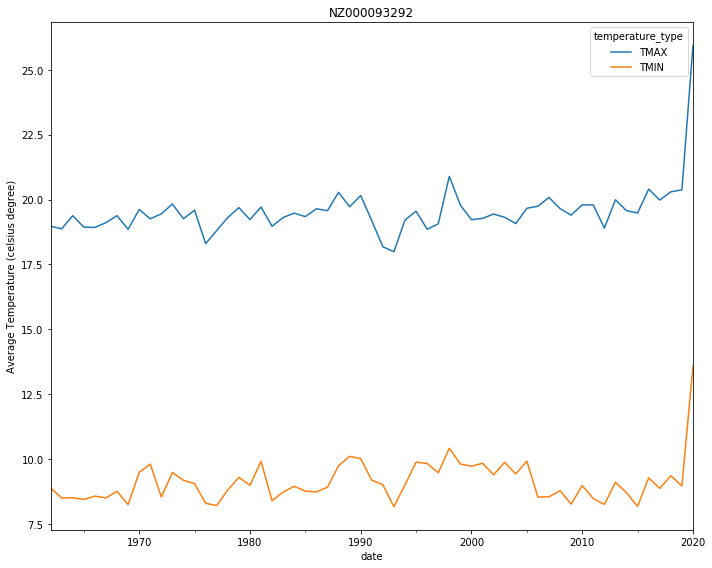

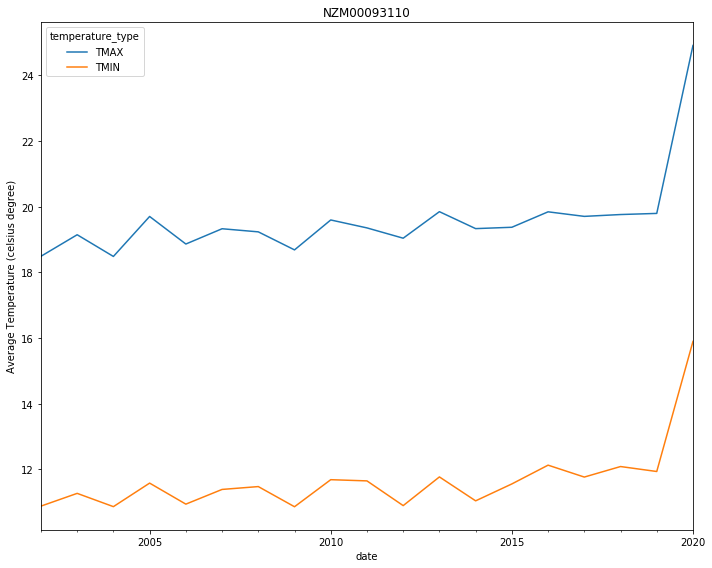

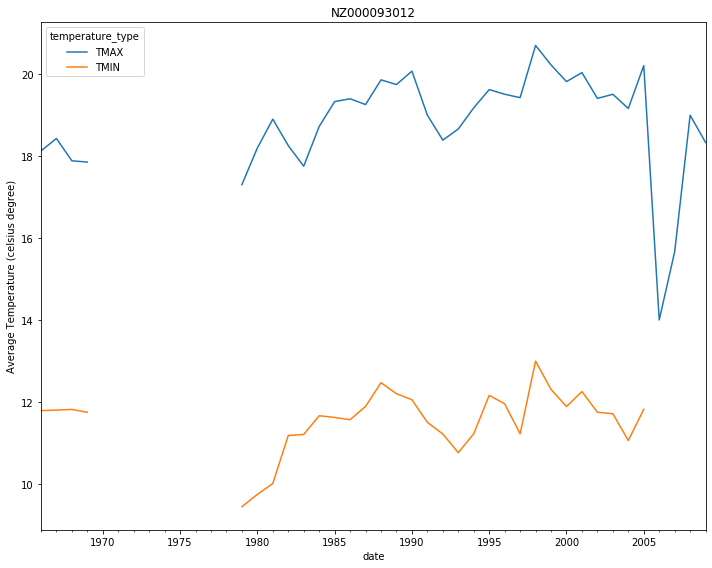

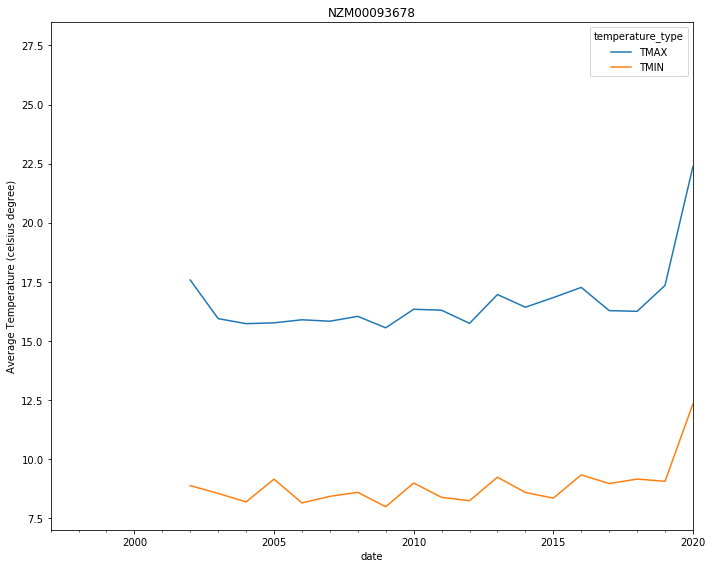

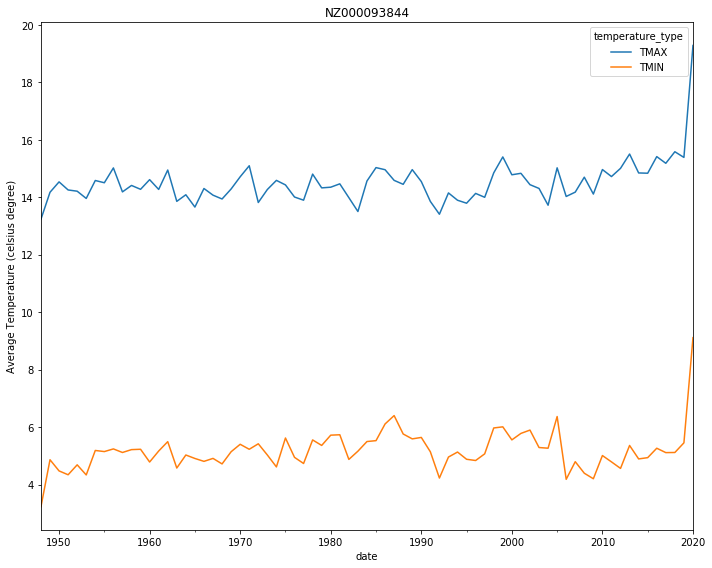

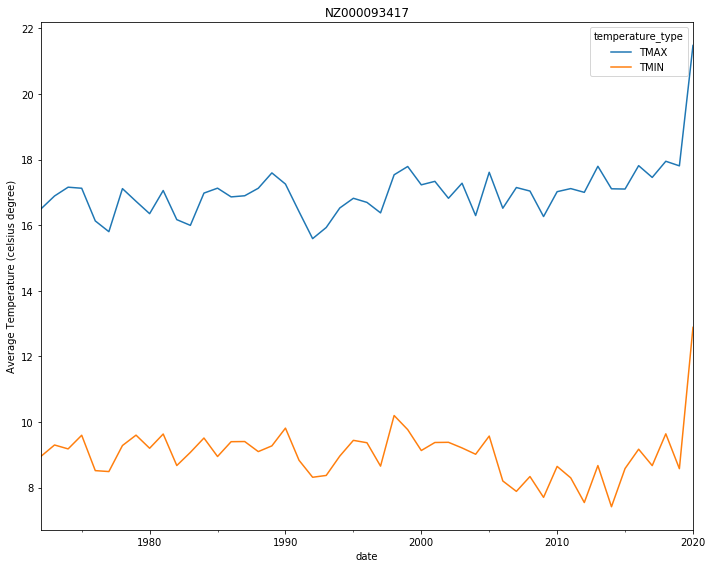

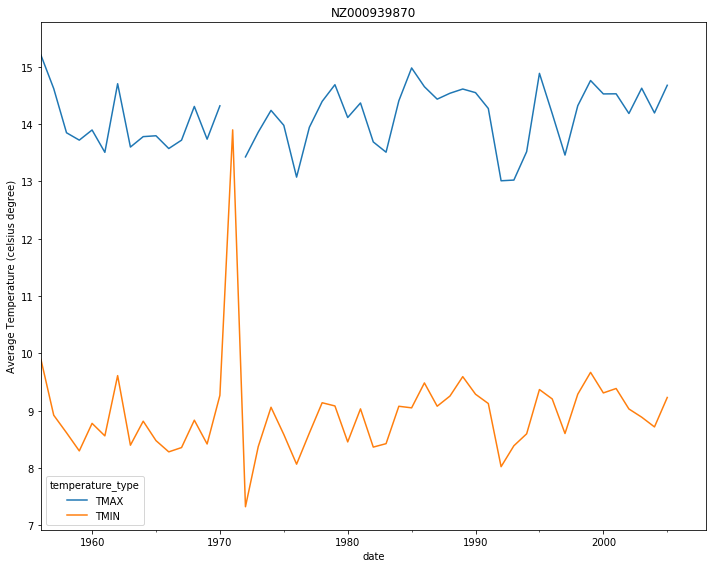

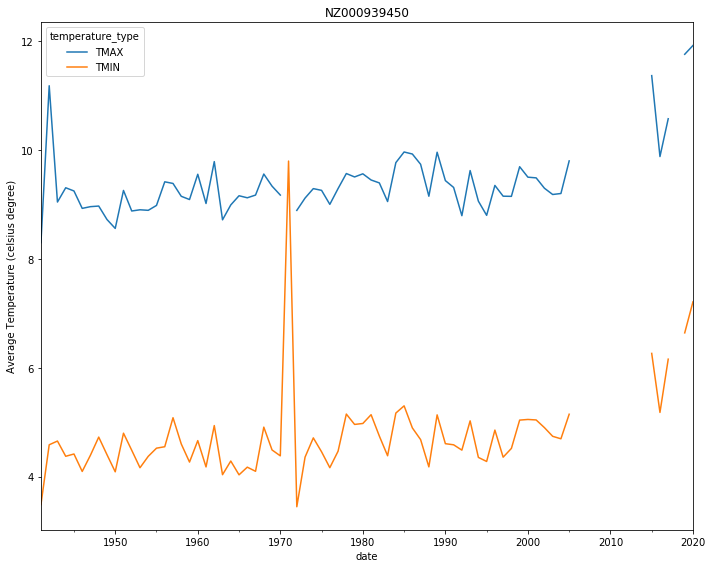

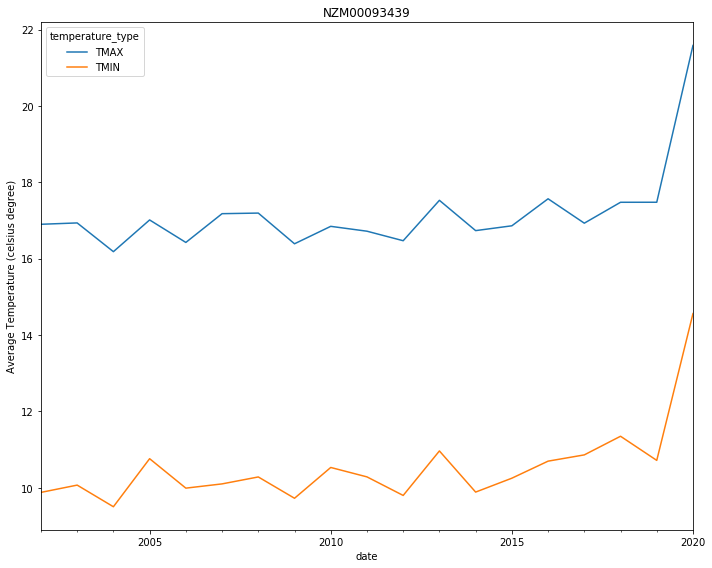

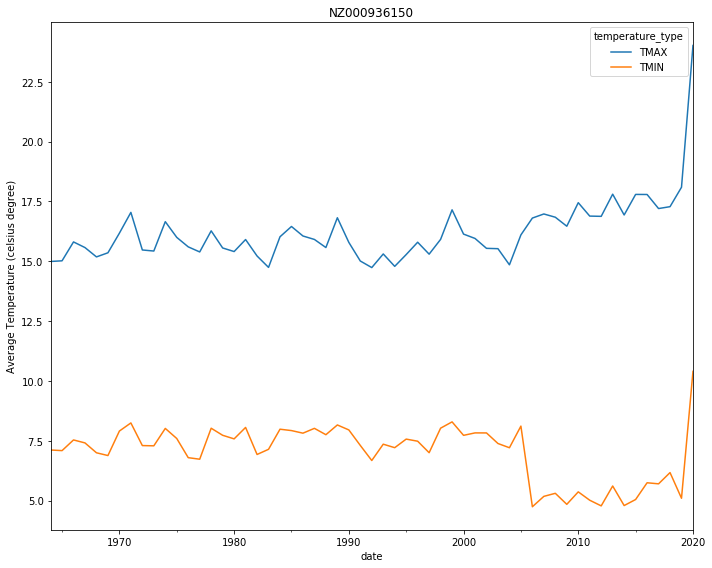

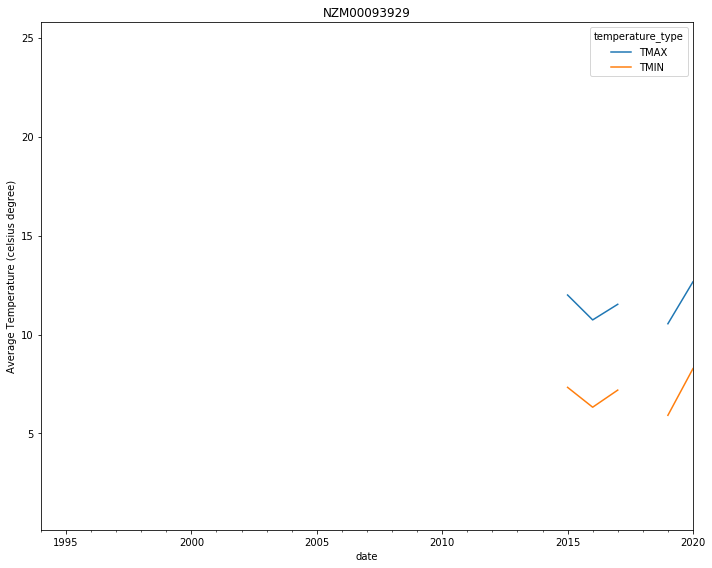

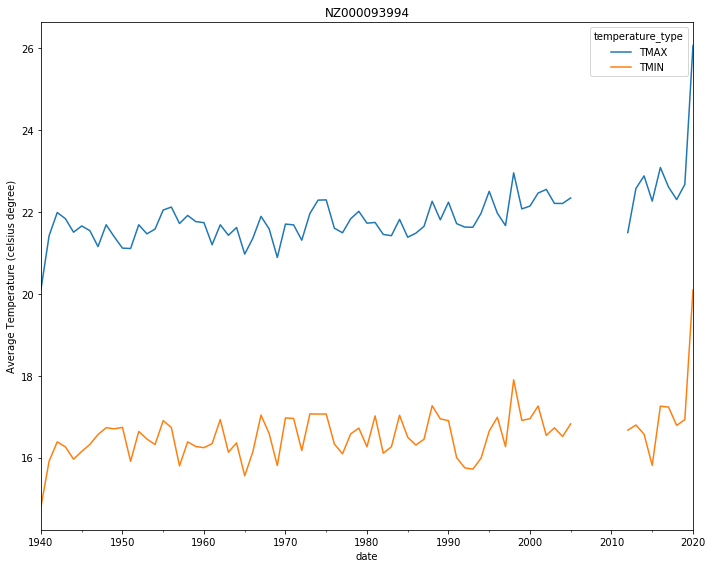

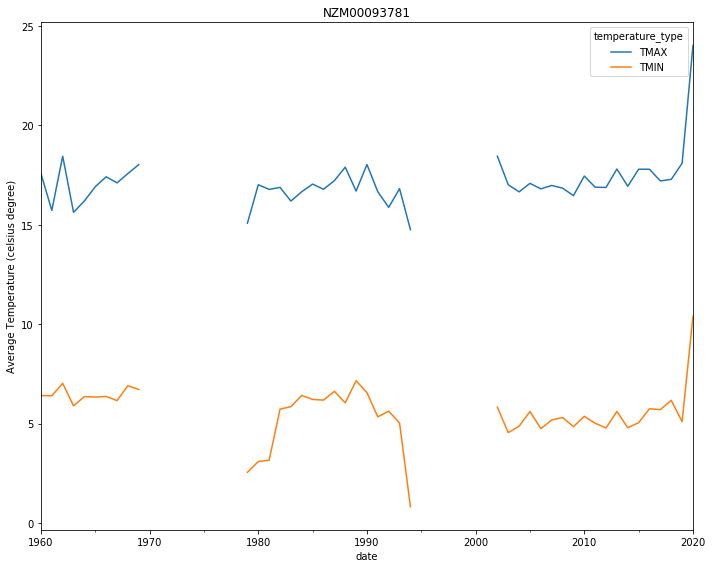

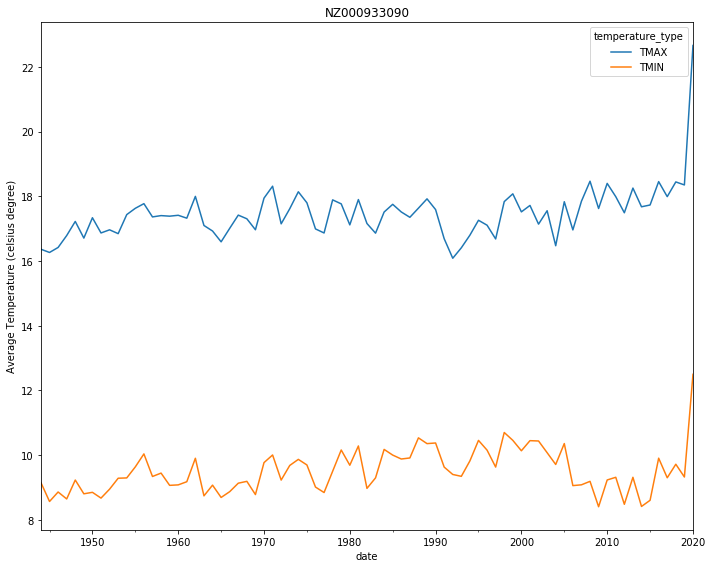

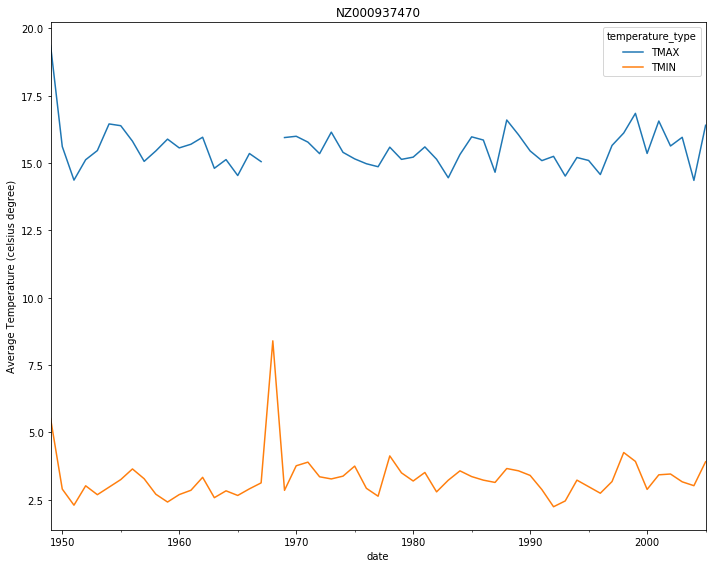

In [60]:
temperature_all_stations = []
for station in stations:
    temperature_each_station = df.loc[station] #get different values based on the station index. 
    temperature_each_station = temperature_each_station.pivot_table(index='date',columns='temperature_type',values='temperature')
    temperature_all_stations.append(temperature_each_station)
    temperature_each_station = temperature_each_station.resample('Y').mean()
    temperature_each_station.plot(title=station,figsize=(10, 8))
    plt.ylabel('Average Temperature (celsius degree)')
    plt.tight_layout()
    #plt.savefig(os.path.join('/Charlotte/shepherding/420scalable/assignment1/temperature', f"tags_combined.png"), bbox_inches="tight")
    #plt.savefig('/Charlotte/shepherding/420scalable/assignment1/temperature\ plots.png')

In [51]:
temperature_all_stations
#plt.plot(temperature_all_stations['date'],temperature_all_stations['TMIN'],temperature_all_stations['TMAX'])

list

In [50]:
temperature_nz = pd.concat(temperature_all_stations, axis=1) #merge the list into a dataframe with axis of columns
temperature_nz

temperature_type,TMAX,TMIN,TMAX,TMIN,TMAX,TMIN,TMAX,TMIN,TMAX,TMIN,...,TMAX,TMIN,TMAX,TMIN,TMAX,TMIN,TMAX,TMIN,TMAX,TMIN
date,,,,,,,,,,,,,,,,,,,,,
1940-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.1,21.1,NaN,NaN,NaN,NaN,NaN,NaN
1940-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.3,22.7,NaN,NaN,NaN,NaN,NaN,NaN
1940-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25.0,22.2,NaN,NaN,NaN,NaN,NaN,NaN
1940-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.1,19.7,NaN,NaN,NaN,NaN,NaN,NaN
1940-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.3,18.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,22.1,NaN,27.9,16.1,NaN,NaN,19.7,10.7,24.0,5.9,...,NaN,NaN,27.5,22.7,21.8,7.8,22.9,10.1,NaN,NaN
2020-03-02,21.6,12.7,25.4,NaN,NaN,NaN,NaN,13.3,27.3,8.6,...,NaN,NaN,27.3,23.2,NaN,NaN,23.6,13.5,NaN,NaN
2020-03-03,29.1,12.4,27.6,17.9,NaN,NaN,29.9,NaN,21.5,NaN,...,NaN,NaN,28.2,NaN,30.8,NaN,24.7,16.3,NaN,NaN


In [55]:
#get the mean values of TMIN and TMAX
temperature_nz['AVG_TMIN'] = temperature_nz['TMIN'].mean(axis=1)
temperature_nz['AVG_TMIN'] = temperature_nz['TMAX'].mean(axis=1)

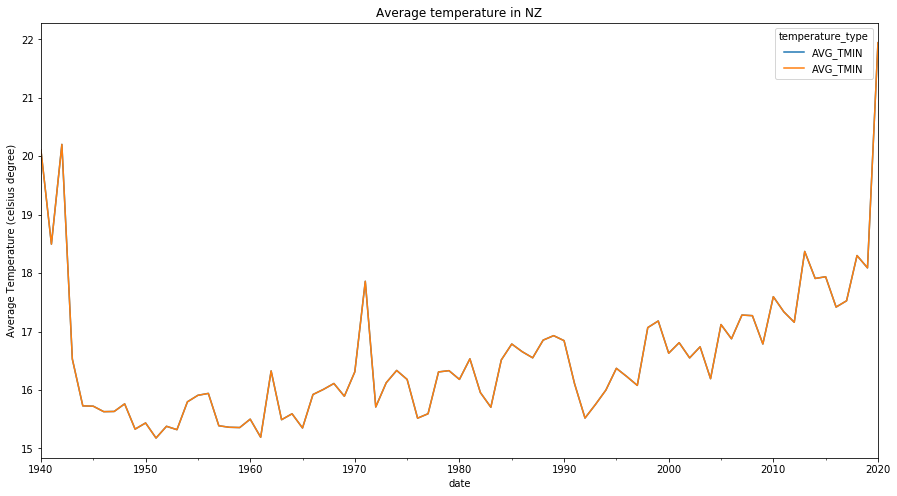

In [59]:
temperature_nz[['AVG_TMIN', 'AVG_TMIN']].resample('Y').mean().plot(title='Average temperature in NZ', figsize=(15, 8),)
plt.ylabel('Average Temperature (celsius degree)')
plt.savefig('/Charlotte/shepherding/420scalable/assignment1/temperature\ plots.png')